In [1]:
from sklearn import set_config

set_config(print_changed_only=False)

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income')

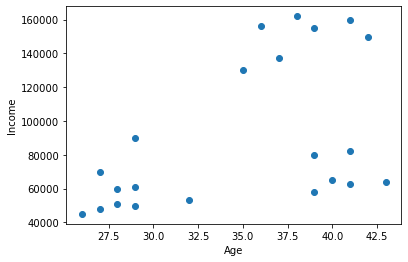

In [4]:
import matplotlib.pyplot as plt

plt.scatter(df['Age'], df['Income($)']);
plt.xlabel('Age')
plt.ylabel("Income")

In [5]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs='deprecated',
       precompute_distances='deprecated', random_state=None, tol=0.0001,
       verbose=0)

In [6]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [7]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

In [8]:
df['Cluster'] = y_predicted
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


Text(0, 0.5, 'Income')

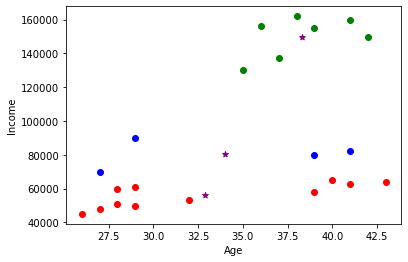

In [9]:
df1 = df[df['Cluster'] == 0]
df2 = df[df['Cluster'] == 1]
df3 = df[df['Cluster'] == 2]

plt.scatter(df1['Age'], df1['Income($)'], color='red')
plt.scatter(df2['Age'], df2['Income($)'], color='green')
plt.scatter(df3['Age'], df3['Income($)'], color='blue')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', label='Centroid', color='purple')

plt.xlabel('Age')
plt.ylabel("Income")

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Income($)'] = scaler.fit_transform(df[['Income($)']])
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1


In [11]:
df['Age'] = scaler.fit_transform(df[['Age']])
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [12]:
km_new = KMeans(n_clusters=3)
y_predicted_new = km_new.fit_predict(df[['Age', 'Income($)']])
y_predicted_new

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [13]:
df['Cluster'] = y_predicted_new
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


Text(0, 0.5, 'Income')

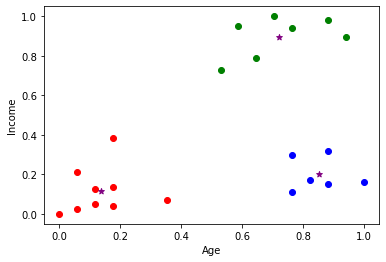

In [14]:
df1 = df[df['Cluster'] == 0]
df2 = df[df['Cluster'] == 1]
df3 = df[df['Cluster'] == 2]

plt.scatter(df1['Age'], df1['Income($)'], color='red')
plt.scatter(df2['Age'], df2['Income($)'], color='green')
plt.scatter(df3['Age'], df3['Income($)'], color='blue')

plt.scatter(km_new.cluster_centers_[:, 0], km_new.cluster_centers_[:, 1], marker='*', color='purple')

plt.xlabel('Age')
plt.ylabel("Income")

In [15]:
k_range = range(1, 10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2621792762345213,
 0.22020960864009395,
 0.17840674931327935,
 0.13717729016208893,
 0.10663983840905439]

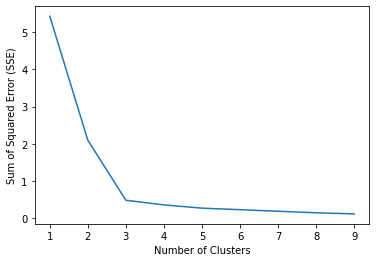

In [16]:
plt.xlabel('Number of Clusters')
plt.ylabel("Sum of Squared Error (SSE)")
plt.plot(k_range, sse);